In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

# Append to sys.path the absolute path to src/pySICOPOLIS
path_list = os.path.abspath('').split('/')
path_src_pySICOPOLIS = ''
for link in path_list[:-1]:
    path_src_pySICOPOLIS = path_src_pySICOPOLIS+link+'/'
sys.path.append(path_src_pySICOPOLIS+'/src')

# Now import module pySICOPOLIS
from pySICOPOLIS import *

In [2]:
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'
ds_age = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')

In [3]:
age = ds_age['age_norm'][:21].data
age_uncert = ds_age['age_norm_uncert'][:21].data

mask_age = np.isnan(age).astype(int)
mask_age_uncert = np.isnan(age_uncert).astype(int)

np.sum(mask_age), np.sum(mask_age_uncert)

(57855605, 57823985)

In [4]:
mask1 = ((mask_age==1) & (mask_age_uncert==0))
mask2 = ((mask_age==0) & (mask_age_uncert==1))
np.sum(mask1), np.sum(mask2)

(57846, 26226)

<Axes: >

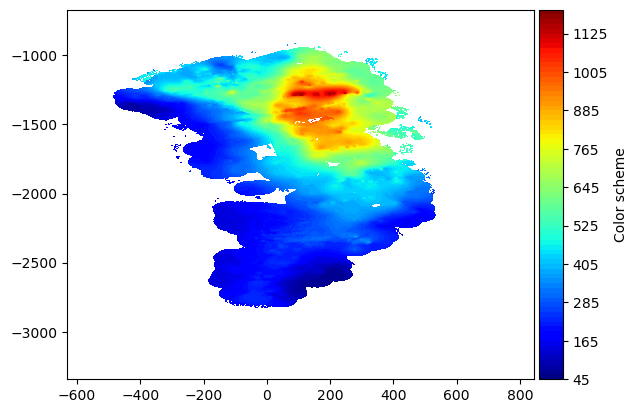

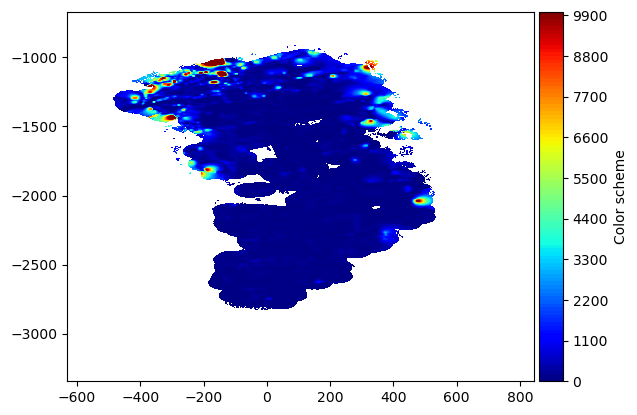

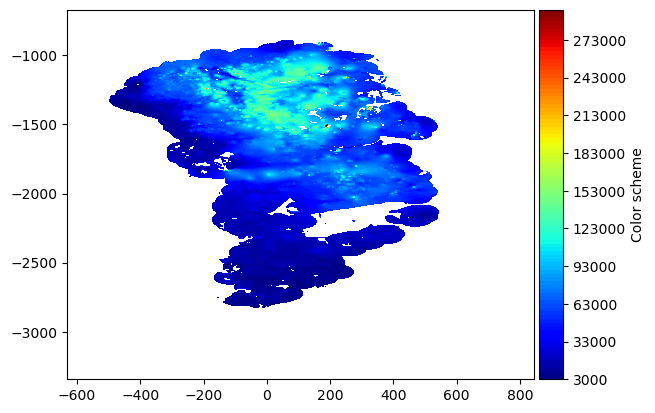

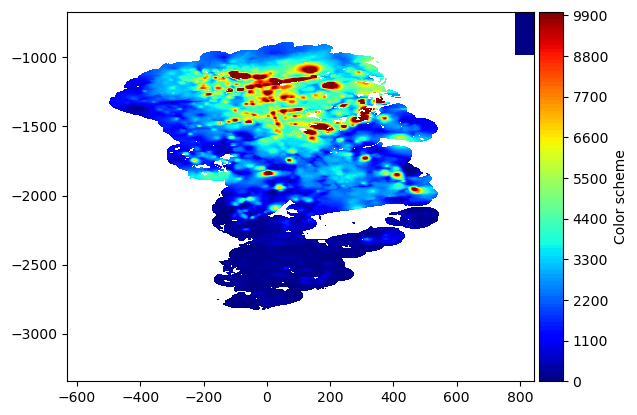

In [19]:
temp = ds_age['age_norm_uncert'][:21].data
temp[temp>=10000]=10000
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['age_norm'][0],
                         cmap = 'jet', nbins = 100)
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         temp[0],
                         cmap = 'jet', nbins = 100, vmin = 0, vmax = 10000)
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['age_norm'][20],
                         cmap = 'jet', nbins = 100)
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         temp[20],
                         cmap = 'jet', nbins = 100, vmin = 0, vmax = 10000)

In [6]:
indices = []
for k_idx in range(ds_age['age_norm'].data.shape[0]):
    try:
        temp = np.sum(ds_age['age_norm_uncert'][k_idx]).data
    except:
        for i_idx in range(ds_age['age_norm'].data.shape[1]):
            try:
                temp = np.sum(ds_age['age_norm_uncert'][k_idx, i_idx]).data
            except:
                print(k_idx, i_idx)
                for j_idx in range(ds_age['age_norm'].data.shape[2]):
                    try:
                        temp = np.sum(ds_age['age_norm_uncert'][k_idx, i_idx, j_idx]).data
                    except:
                        indices.append([k_idx, i_idx, j_idx])

21 763
21 764
21 765
21 766
21 767
21 768
21 769
21 770
21 771
21 772
21 773
21 774
21 775
21 776
21 777
21 778
21 779
21 780
21 781
21 782
21 783
21 784
21 785
21 786
21 787
21 788
21 789
21 790
21 791
21 792
21 793
21 794
21 795
21 796
21 797
21 798
21 799
21 800
21 801
21 802
21 803
21 804
21 805
21 806
21 807
21 808
21 809
21 810
21 811
21 812
21 813
21 814
21 815
21 816
21 817
21 818
21 819
21 820
21 821
21 822
21 823
21 824
21 825
21 826
21 827
21 828
21 829
21 830
21 831
21 832
21 833
21 834
21 835
21 836
21 837
21 838
21 839
21 840
21 841
21 842
21 843
21 844
21 845
21 846
21 847
21 848
21 849
21 850
21 851
21 852
21 853
21 854
21 855
21 856
21 857
21 858
21 859
21 860
21 861
21 862
21 863
21 864
21 865
21 866
21 867
21 868
21 869
21 870
21 871
21 872
21 873
21 874
21 875
21 876
21 877
21 878
21 879
21 880
21 881
21 882
21 883
21 884
21 885
21 886
21 887
21 888
21 889
21 890
21 891
21 892
21 893
21 894
21 895
21 896
21 897
21 898
21 899
21 900
21 901
21 902
21 903
21 904
21 905

In [17]:
len(indices)/(3*(1307-763+1)) # A cube of size 3x(1307-763+1)x2337 is corrupt

2337.0

In [12]:
indices_21 = [index for index in indices if index[0] == 21]
indices_22 = [index for index in indices if index[0] == 22]
indices_23 = [index for index in indices if index[0] == 23]

len(indices_21), len(indices_22), len(indices_23)